In [1]:
# auto reload
%load_ext autoreload
%autoreload 2

In [2]:
from magicmix import MagicMixStableDiffusionImg2ImgPipeline
from diffusers import DDIMScheduler
import torch

seed = 42
generator = torch.Generator(device="mps").manual_seed(seed)

pipe = MagicMixStableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("mps")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
# pipe.enable_attention_slicing()

/Users/njindal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]/Users/njindal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/safetensors/torch.py:99: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(filename, framework="pt", device=device) as f:
/Users/njindal/.pyenv/versions/3.10.0/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This 

100%|██████████| 30/30 [00:15<00:00,  1.96it/s]


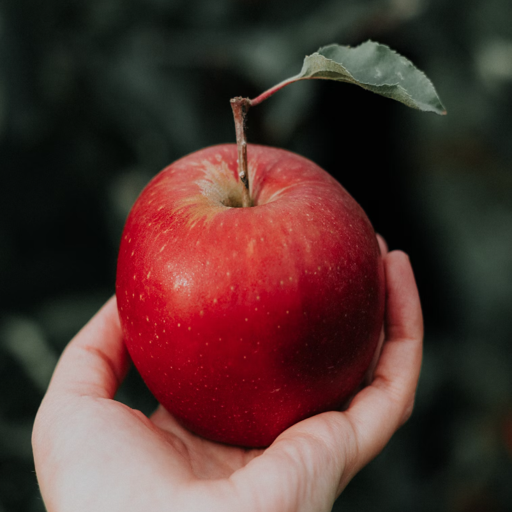

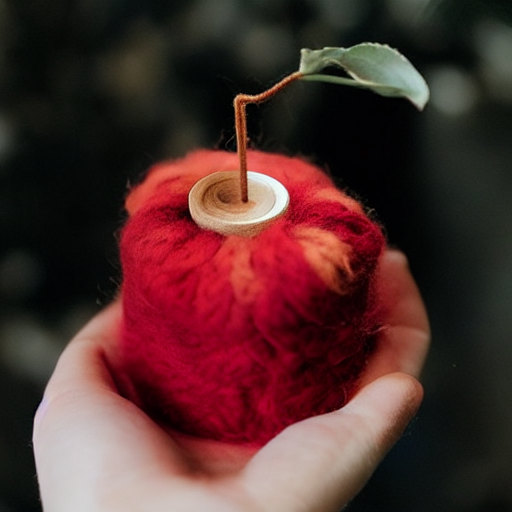

In [63]:
from PIL import Image

init_image = Image.open("assets/apple.png").convert("RGB").resize((512, 512))
prompt = "wool"

image = pipe(prompt=prompt, image=init_image, num_inference_steps=50,
             k_min=0.3, k_max=0.6, v=0.5, generator=generator).images[0]

display(init_image)
display(image)